In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_comp = pd.read_csv('/home/james/anaconda3/data/haralick/beetmoz.csv')

In [6]:
data_comp.head()

,Initial_Time_Signature_0,Initial_Time_Signature_1,Compound_Or_Simple_Meter,Triple_Meter,Quintuple_Meter,Changes_of_Meter,Most_Common_Pitch_Prevalence,Most_Common_Pitch_Class_Prevalence,Relative_Strength_of_Top_Pitches,Relative_Strength_of_Top_Pitch_Classes,...,Fifths_Pitch_Histogram_5,Fifths_Pitch_Histogram_6,Fifths_Pitch_Histogram_7,Fifths_Pitch_Histogram_8,Fifths_Pitch_Histogram_9,Fifths_Pitch_Histogram_10,Fifths_Pitch_Histogram_11,Unique_Note_Quarter_Lengths,Most_Common_Note_Quarter_Length_Prevalence,Composer
0,3,4,0,1,0,0,0.138446,0.195219,0.755396,0.877551,...,0.250000,0.102041,0.102041,0.051020,0.086735,0.454082,0.877551,11,0.395210,0
1,2,4,0,0,0,0,0.079146,0.174832,0.761905,0.906587,...,0.062275,0.062275,0.201198,0.665868,0.906587,1.000000,0.682635,13,0.500877,0
2,2,4,0,0,0,0,0.050446,0.175163,0.878628,0.877660,...,0.180851,0.055471,0.158815,0.126900,0.094225,0.424012,0.778116,24,0.706507,0
3,4,4,0,0,0,0,0.079491,0.167741,0.850312,0.954680,...,0.104433,0.058128,0.052217,0.431527,1.000000,0.954680,0.907389,21,0.556327,0
4,2,4,0,0,0,0,0.058520,0.184509,0.994118,0.854478,...,0.093284,0.216418,0.188433,0.214552,0.570896,0.854478,1.000000,13,0.410828,0


In [5]:
# This feature is not numeric so it will be dropped.

data_comp.drop('Most_Common_Note_Quarter_Length',axis=1, inplace=1)

In [7]:
import sklearn
import scipy
from scipy.stats import wilcoxon
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [33]:
# Testing the distributions using the Wilcoxon Signed-Rank Test to look for any features with
# significantly diffrent distributions.

sig_feat = []
for col in data_comp.columns:
    x = data_comp[data_comp['Composer']==0][:600][col]
    y = data_comp[data_comp['Composer']==1][:600][col]
    Wil = wilcoxon(x,y)
    if Wil[1] < 1e-10:
        sig_feat.append(col)
        print(col, Wil[1])
        
sig_feat = sig_feat[:-1]
sig_feat += ['Most_Common_Pitch', 'Interval_Between_Strongest_Pitch_Classes','Pitch_Class_Variety', 
             'Changes_of_Meter', 'Importance_of_Middle_Register']
print(len(sig_feat))

/home/james/anaconda3/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


Importance_of_Bass_Register 5.53304779471e-25
Basic_Pitch_Histogram_29 4.18840544465e-14
Basic_Pitch_Histogram_30 3.14079058046e-17
Basic_Pitch_Histogram_32 8.27276837694e-12
Basic_Pitch_Histogram_36 1.92569620853e-18
Basic_Pitch_Histogram_37 4.12970358681e-23
Basic_Pitch_Histogram_41 5.64747493038e-14
Basic_Pitch_Histogram_42 2.70349858972e-13
Basic_Pitch_Histogram_43 4.05426480495e-11
Basic_Pitch_Histogram_44 4.59677949196e-18
Basic_Pitch_Histogram_47 9.4795532253e-11
Basic_Pitch_Histogram_48 1.1032818183e-20
Basic_Pitch_Histogram_49 5.73558974779e-12
Basic_Pitch_Histogram_52 1.28706803401e-11
Basic_Pitch_Histogram_74 2.23489609802e-11
Basic_Pitch_Histogram_87 2.61005027293e-15
Basic_Pitch_Histogram_88 7.14840437434e-23
Basic_Pitch_Histogram_89 4.393741357e-30
Basic_Pitch_Histogram_90 4.10204625598e-23
Basic_Pitch_Histogram_91 1.28952821014e-31
Basic_Pitch_Histogram_92 3.3636022377e-26
Basic_Pitch_Histogram_93 2.20499331165e-26
Basic_Pitch_Histogram_94 6.40348859887e-17
Basic_Pitch_H

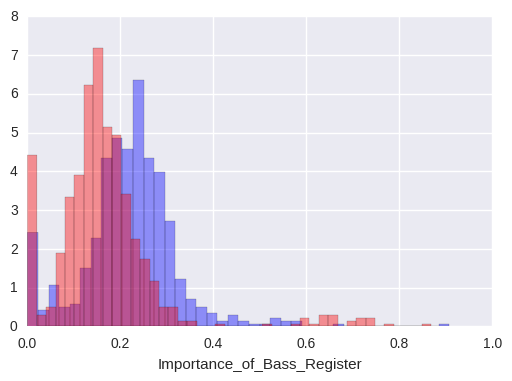

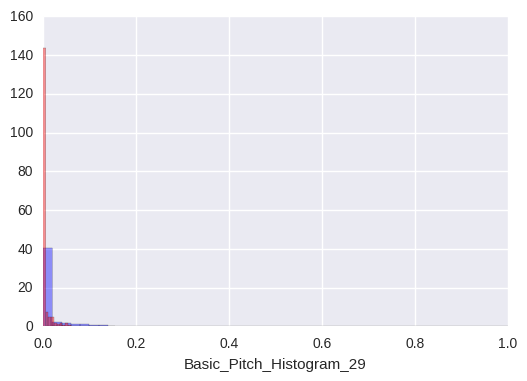

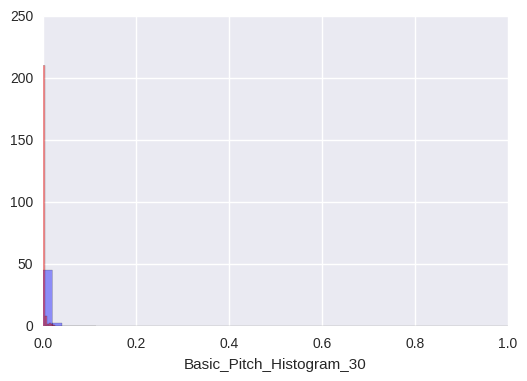

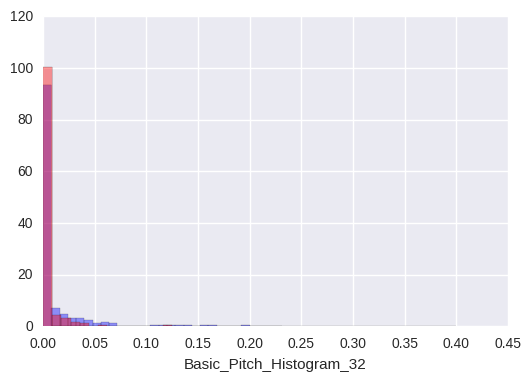

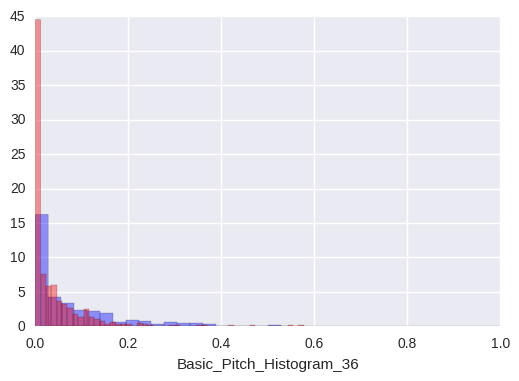

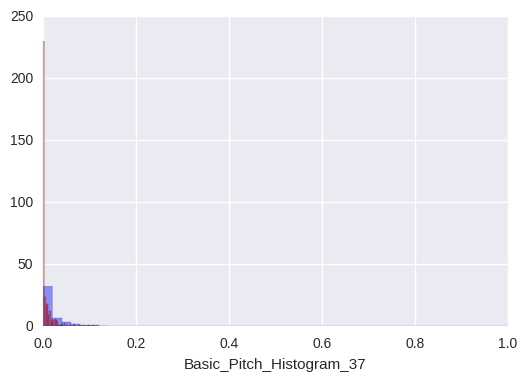

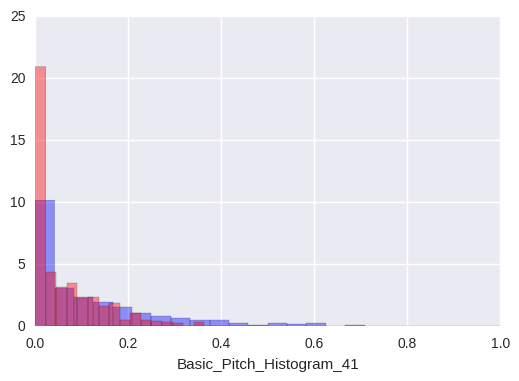

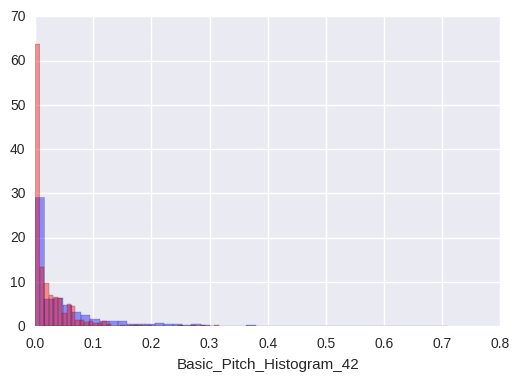

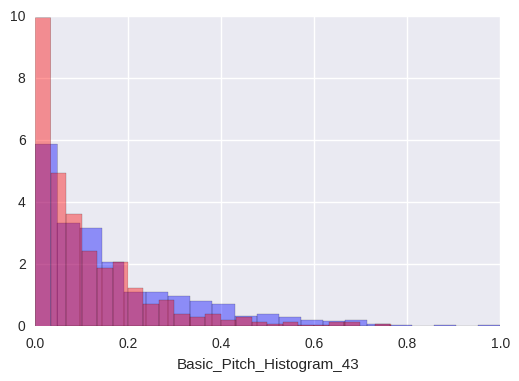

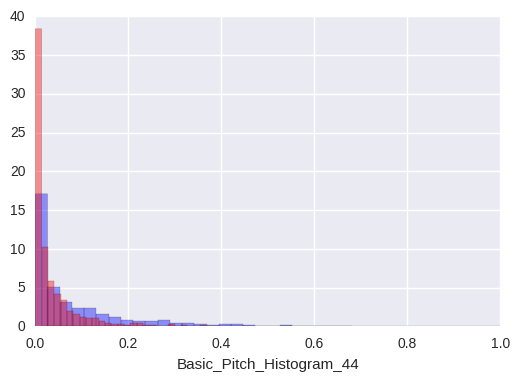

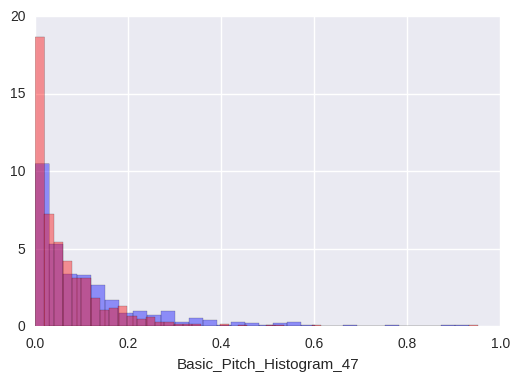

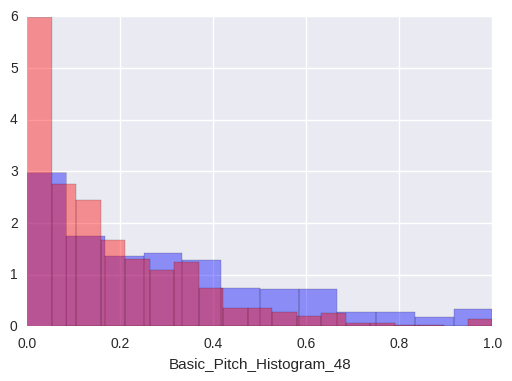

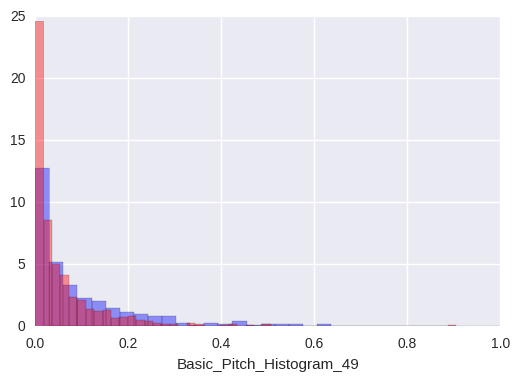

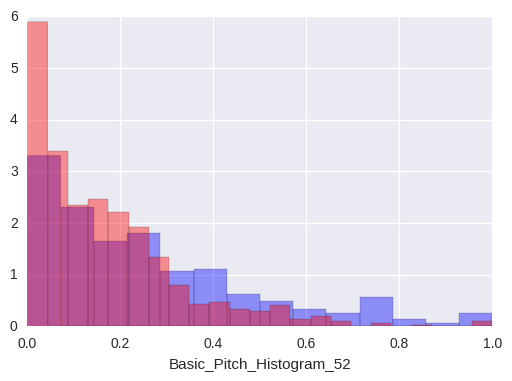

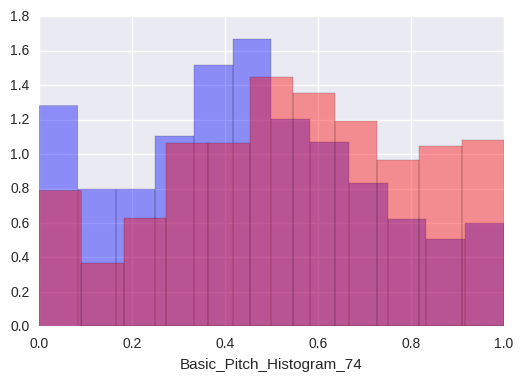

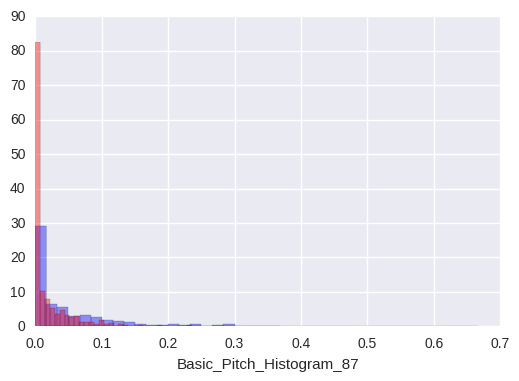

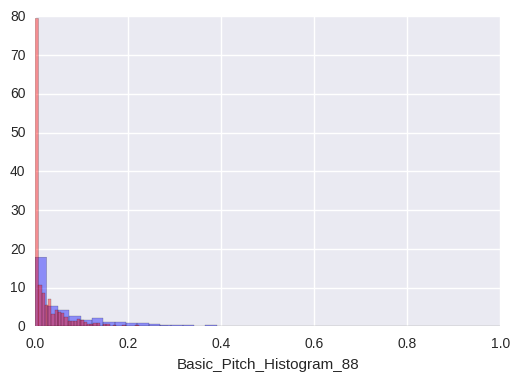

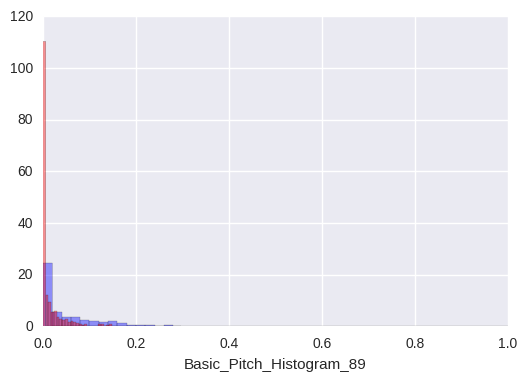

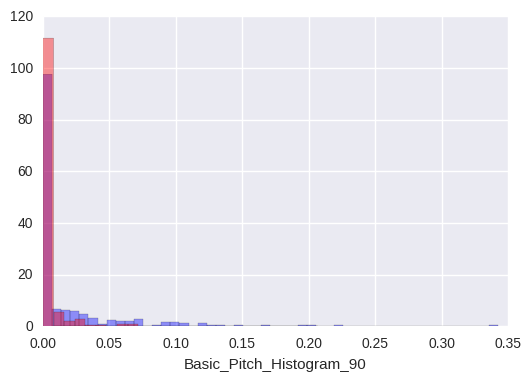

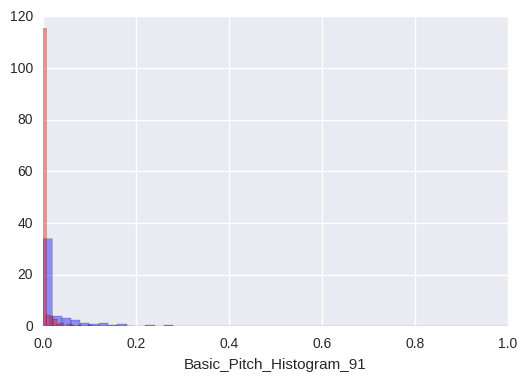

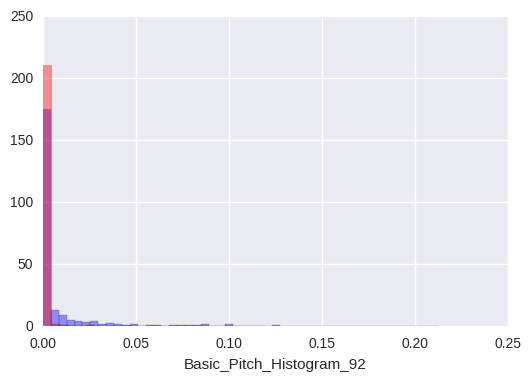

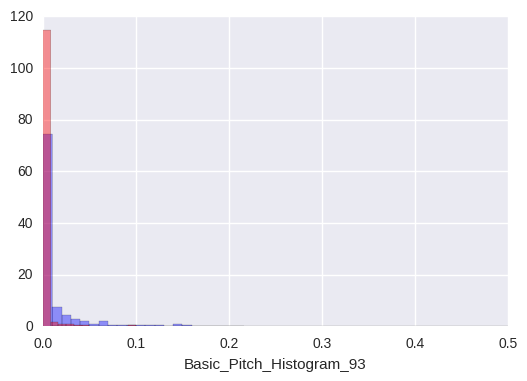

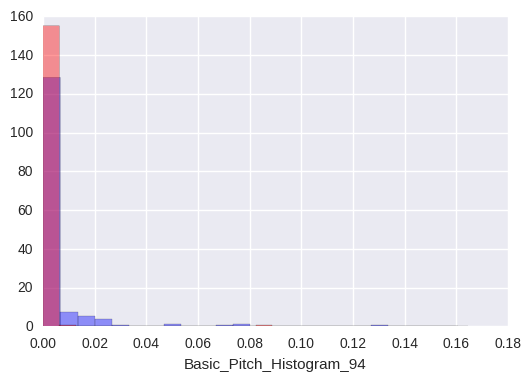

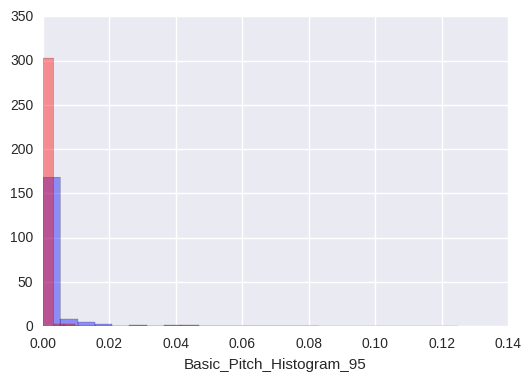

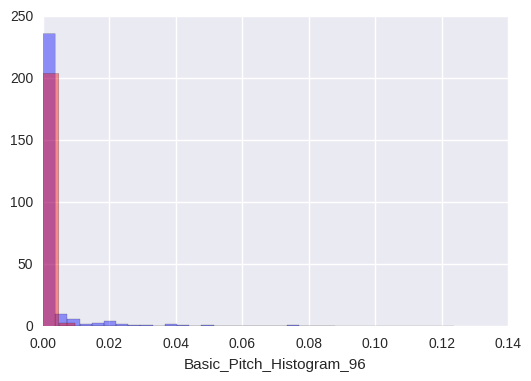

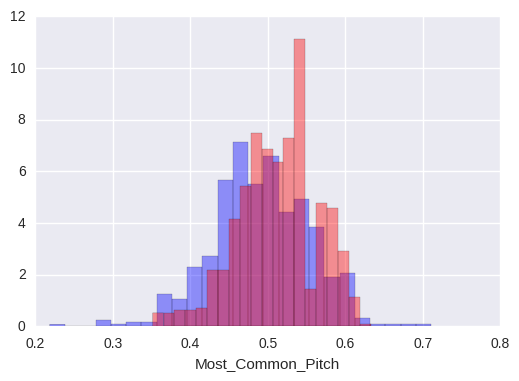

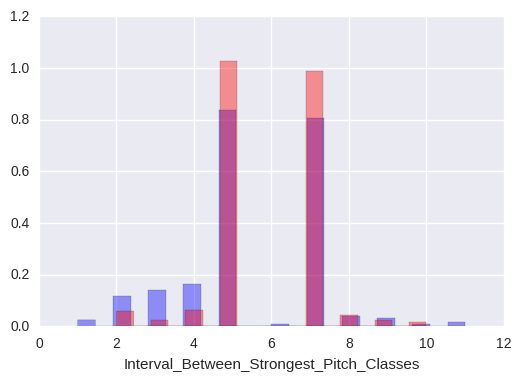

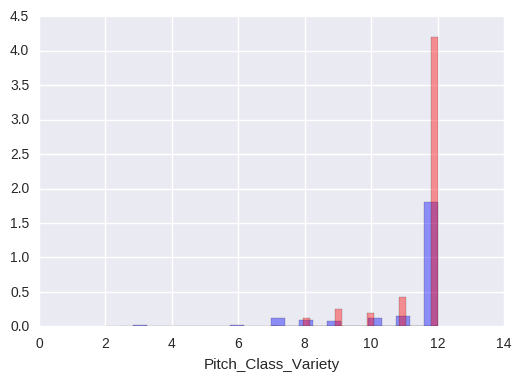

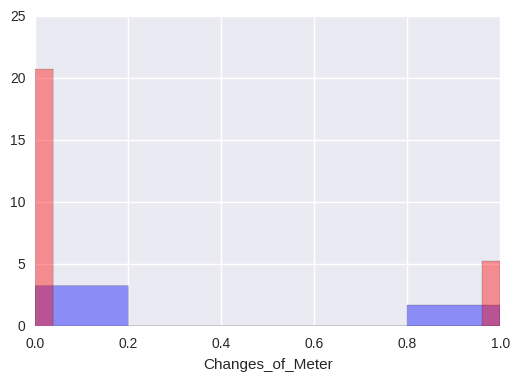

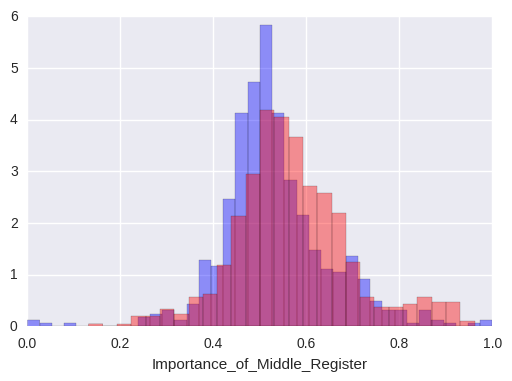

In [113]:
# Plotting the features deemed significant by the test above. Blue is Beethoven, red is Mozart.

k = 0 
for col in sig_feat:
    x = data_comp[data_comp['Composer']==0][col]
    y = data_comp[data_comp['Composer']==1][col]

    f = sns.plt.figure()
    
    for a in [x, y]:
        if k % 2 == 0:
            c = 'blue'
        else:
            c = 'red'
        k += 1
        sns.distplot(a, kde=0, norm_hist=1, color=c)
    
    sns.plt.show()


In [35]:
# Create DataFrame with significant features

data_sig = data_comp[sig_feat + ['Composer']]
data_sig.head()

,Importance_of_Bass_Register,Basic_Pitch_Histogram_29,Basic_Pitch_Histogram_30,Basic_Pitch_Histogram_32,Basic_Pitch_Histogram_36,Basic_Pitch_Histogram_37,Basic_Pitch_Histogram_41,Basic_Pitch_Histogram_42,Basic_Pitch_Histogram_43,Basic_Pitch_Histogram_44,...,Basic_Pitch_Histogram_93,Basic_Pitch_Histogram_94,Basic_Pitch_Histogram_95,Basic_Pitch_Histogram_96,Most_Common_Pitch,Interval_Between_Strongest_Pitch_Classes,Pitch_Class_Variety,Changes_of_Meter,Importance_of_Middle_Register,Composer
0,0.021912,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.562500,5,12,0,0.691235,0
1,0.229062,0.0,0.0,0.0,0.013228,0.243386,0.068783,0.005291,0.119048,0.140212,...,0.000000,0.000000,0.000000,0.00000,0.453125,7,12,0,0.603643,0
2,0.234926,0.0,0.0,0.0,0.121372,0.034301,0.240106,0.042216,0.306069,0.126649,...,0.189974,0.050132,0.010554,0.07124,0.562500,7,12,0,0.415413,0
3,0.286068,0.0,0.0,0.0,0.000000,0.000000,0.135135,0.051975,0.162162,0.072765,...,0.000000,0.000000,0.000000,0.00000,0.453125,7,12,0,0.583044,0
4,0.236833,0.0,0.0,0.0,0.035294,0.017647,0.294118,0.176471,0.070588,0.176471,...,0.005882,0.011765,0.000000,0.00000,0.507812,5,12,0,0.508434,0


In [71]:
X_s = data_sig.ix[:,:-1].as_matrix()
y = data_sig['Composer']
Norm = sklearn.preprocessing.Normalizer()
Norm.fit(X_s)
X_n = Norm.transform(X_s)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_s,y)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [105]:
clf = GradientBoostingClassifier(learning_rate=0.007, n_estimators=1000,subsample=0.95,
                             max_depth=4, verbose=0)
clf_2 = SVC(kernel='linear')
clf_3 = LogisticRegression(max_iter=1000)
clf_4 = SVC()
clf_5 = KNeighborsClassifier(n_neighbors=3)
clf_6 = GaussianNB()

In [101]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.007, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=0.95, verbose=0, warm_start=False)

In [102]:
accuracy_score(y_test, clf.predict(X_test))

0.85889570552147243

In [111]:
X_m = data_comp.values
np.random.shuffle(X_m)
X_r = X_m[:,:-1]
y_r = X_m[:,-1]

In [112]:
clfs = {1:'Gradient Boosted Tree :', 2:'Linear Support Vector :', 3:'Logisitic Regression :',
        4:'Radial Basis Support Vector :', 5:'KNN(k=3) :', 6:'Naive Bayes :'}
clf_list = [clf, clf_2, clf_3, clf_4, clf_5, clf_6]

print('Average Classifier Accuracy Scores on 10-fold Cross-Validation: ')

for k in range(6): 
    
    print(clfs[k+1], 100* round(cross_val_score(clf_list[k], X_r, y_r, cv=10).mean(),4))

Average Classifier Accuracy Scores on 10-fold Cross-Validation: 
Gradient Boosted Tree : 85.86
Linear Support Vector : 80.18
Logisitic Regression : 79.02
Radial Basis Support Vector : 76.17
KNN(k=3) : 71.32
Naive Bayes : 73.02
